In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib, glob
import cartopy.crs as ccrs
from scipy.signal import savgol_filter
import string
from cartopy.util import add_cyclic_point
from matplotlib import colors

%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
## load surface temperature [K]
TS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato.npy')
TS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato.npy')
TS_8xco2_control = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_spinup.npy')[:-120]
TS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato.npy')
TS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato.npy')
TS_1xco2_control = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI.npy')

In [5]:
## compute zonal average for each cloud-locking simulation
TSzonal_8xco2_nostrato = yearly_avg(np.nanmean(TS_8xco2_nostrato, axis = -1),30)
TSzonal_8xco2_strato = yearly_avg(np.nanmean(TS_8xco2_strato, axis = -1),30)
TSzonal_8xco2_control = yearly_avg(np.nanmean(TS_8xco2_control, axis = -1),30)

TSzonal_1xco2_nostrato = yearly_avg(np.nanmean(TS_1xco2_nostrato, axis = -1),30)
TSzonal_1xco2_strato = yearly_avg(np.nanmean(TS_1xco2_strato, axis = -1),30)
TSzonal_1xco2_control = yearly_avg(np.nanmean(TS_1xco2_control, axis = -1),30)

<function matplotlib.pyplot.annotate(text: 'str', xy: 'tuple[float, float]', xytext: 'tuple[float, float] | None' = None, xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data', textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None, arrowprops: 'dict[str, Any] | None' = None, annotation_clip: 'bool | None' = None, **kwargs) -> 'Annotation'>

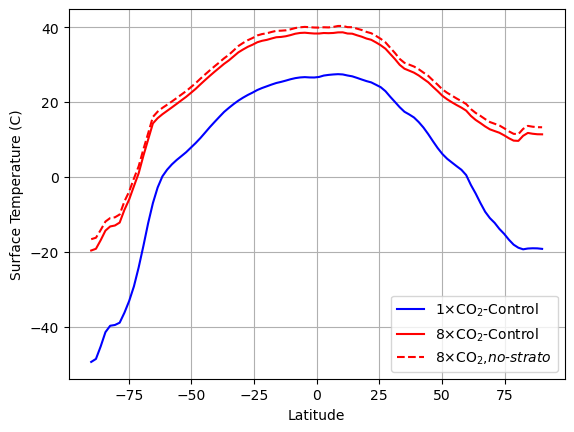

In [18]:
plt.plot(lat, TSzonal_1xco2_control-273, 'b',label = '1$\\times$CO$_2$-Control')
plt.plot(lat, TSzonal_8xco2_control-273, 'r',label = '8$\\times$CO$_2$-Control')
plt.plot(lat, TSzonal_8xco2_nostrato-273, 'r--',label = '8$\\times$CO$_2$,$\\it{no}$-$\\it{strato}$')
plt.grid()
plt.ylabel('Surface Temperature (C)')
plt.xlabel('Latitude')
plt.legend()

EPTD_1xco2 = np.max(TSzonal_1xco2_control) - np.min(TSzonal_1xco2_control)

plt.annotate